# Reading Ge Variations with ENDF6 Library

This is an updated approach, where I generate the `PENDF` files myself from `NJOY`

In [1]:
import pickle
from pylab import *
import matplotlib.image as mpimg
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import h5py
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import gaussian_kde
import ENDF6

In [2]:
#test out the plotting 
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('mplstyles/stylelib/standard.mplstyle')

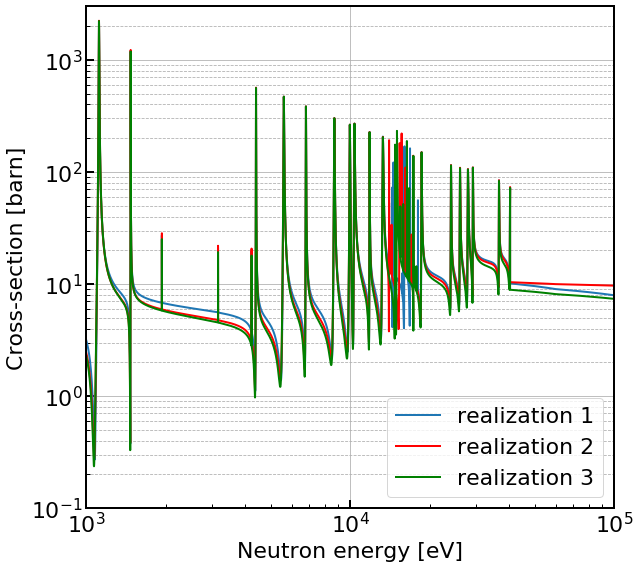

In [6]:
#try it in pendf land
#get some cross section data
f = open('data/n-Ge070-rand-0001.pendf')
lines = f.readlines()
sec = ENDF6.find_section(lines, MF=3, MT=2)  # elastic cross section cross-section
x_0001, y_0001 = ENDF6.read_table(sec)
f.close()

f = open('data/n-Ge070-rand-0150.pendf')
lines = f.readlines()
sec = ENDF6.find_section(lines, MF=3, MT=2)  # elastic cross section cross-section
x_0150, y_0150 = ENDF6.read_table(sec)
f.close()

f = open('data/n-Ge070-rand-0300.pendf')
lines = f.readlines()
sec = ENDF6.find_section(lines, MF=3, MT=2)  # elastic cross section cross-section
x_0300, y_0300 = ENDF6.read_table(sec)
f.close()

#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


#plot quick
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
ax1.plot(x_0001, y_0001,label='realization 1')
ax1.plot(x_0300,y_0300,label='realization 2',color='r')
ax1.plot(x_0150,y_0150,label='realization 3',color='g')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e3, 1e5) 
ax1.set_ylim(0.1,3000)
ax1.set_xlabel('Neutron energy [eV]')
ax1.set_ylabel('Cross-section [barn]')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/Ge70_xncompare.png')
plt.show()


#ax1.set_yscale('log')
#ax1.set_xscale('log')
#xlabel('Neutron energy [eV]')
#ylabel('Cross-section [barn]')
#plt.savefig('figures/figure.png')
#show()

In [ ]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


#plot quick
#fig = plt.figure()
#ax1 = fig.add_subplot(111)
ax1.plot(x_0001, y_0001,label='realization 1')
ax1.plot(x_0300,y_0300,label='realization 2',color='r')
ax1.plot(x_0150,y_0150,label='realization 3',color='g')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(1e4, 2e4) 
ax1.set_ylim(0.1,3000)
ax1.set_xlabel('Neutron energy [eV]',**axis_font)
ax1.set_ylabel('Cross-section [barn]',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=4,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/Ge70_xncompare_zoom.png')
plt.show()